# **Time Series Using R**


Install Packages

In [1]:
install.packages("astsa")
install.packages("tseries")
install.packages("forecast")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘zoo’, ‘quantmod’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘urca’, ‘RcppArmadillo’




**Load Packages**

In [3]:
require(tidyverse)
require(astsa)
require(tseries)
require(forecast)

Loading required package: tidyverse

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: astsa

Loading required package: tseries

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: forecast


Attaching package: ‘forecast’


The following object is masked from ‘package:astsa’:

    gas




**Load package help file**

In [4]:
help(astsa)

Warning message in seq_len(head.end.idx):
“first element used of 'length.out' argument”
ERROR while rich displaying an object: Error in seq_len(head.end.idx): argument must be coercible to non-negative integer

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_conte

**Plot Johnson & Johnson Data**

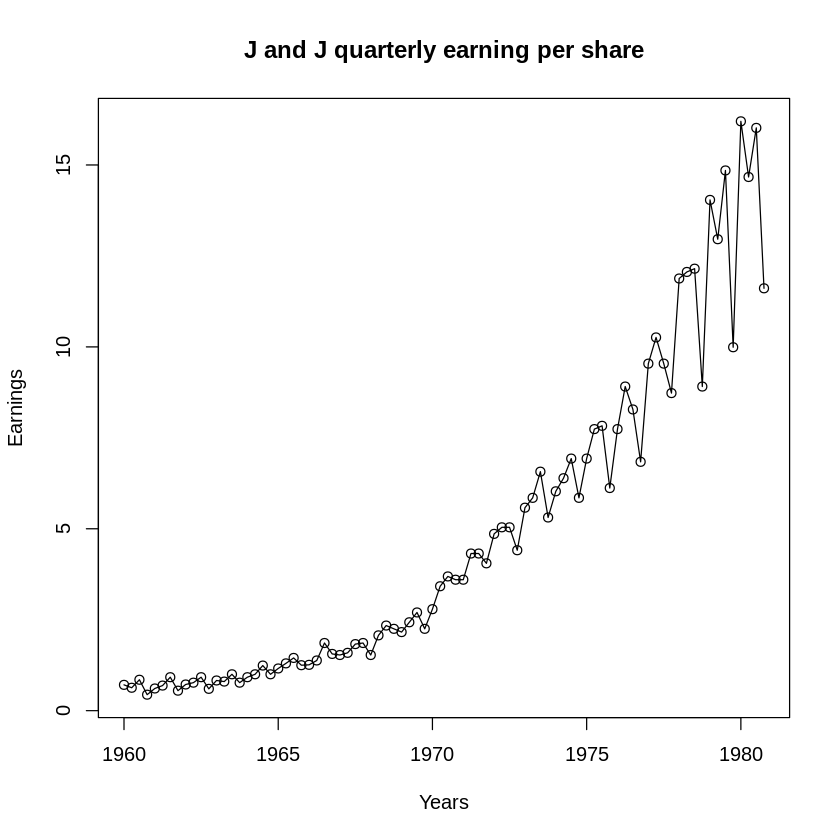

In [5]:
plot(jj,type='o',main='J and J quarterly earning per share',ylab='Earnings',xlab='Years')

In [6]:
help(jj)

Warning message in seq_len(head.end.idx):
“first element used of 'length.out' argument”
ERROR while rich displaying an object: Error in seq_len(head.end.idx): argument must be coercible to non-negative integer

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_conte

**Random process using rnorm**

In [7]:
purely_random_process=ts(rnorm(100))
print(purely_random_process)

Time Series:
Start = 1 
End = 100 
Frequency = 1 
  [1]  2.30959785 -0.85875856  0.86796936  2.02136651 -1.56603908  0.47624827
  [7] -0.06260000  1.31029840  1.00094036  0.93546595  0.22223682 -2.13736521
 [13] -1.04418406 -0.02494591 -0.61900193  0.34210315  0.38448118  0.77263301
 [19] -0.18843093  3.46080757  0.19092987 -0.75652267  0.74992781 -0.08894767
 [25]  0.59107054 -0.03993666  0.23833667 -2.15322406 -1.03248989  0.56661713
 [31]  0.82618633 -1.41314839  1.02338398 -1.27414987 -2.26835235  1.34303695
 [37]  0.99919120  2.33810524  2.86970905  0.17788775 -0.01269625  1.65856186
 [43] -0.65729303 -1.98921810 -0.77706398 -2.07908716 -0.75638275 -0.66105407
 [49] -0.46552801 -1.32765536  0.15091679  2.48954376  1.46001882 -2.41910670
 [55] -0.06623615  0.16662853 -1.11068564 -0.41958065 -0.44124336 -0.16206534
 [61]  0.40062563  2.02989959  0.35835606 -1.12469396  0.33796762  1.27877500
 [67]  1.14248947 -0.39669915 -0.53449596  0.79200090  1.87480442  1.29956449
 [73] -0.42204

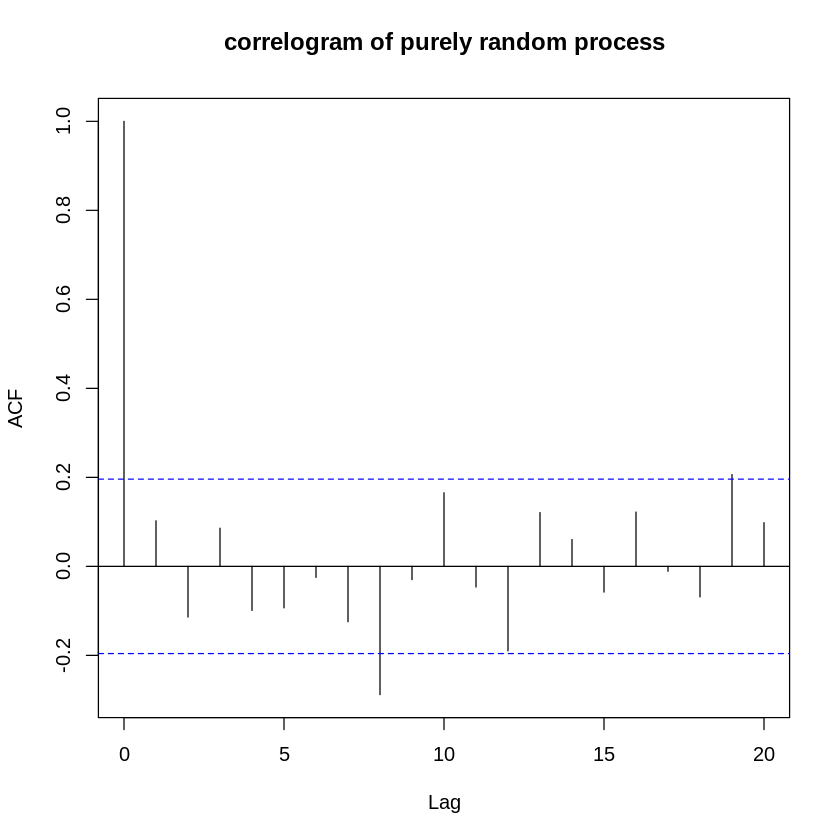

In [8]:
## ACF
acf(purely_random_process,main='correlogram of purely random process')

**Simulation of a Random Walk Process**

In [9]:
x=NULL
x[1]=0 # We start with x1=0 in Random Walk Process

       # Now I have to start from my previous step and add some noise to it, to get the next step. 
       # We do it for 2 to 1000 iterations
for (i in 2:2000)
{
      x[i]=x[i-1]+rnorm(1)
}


In [10]:
x

[1]   0.000000000  -0.599235045   0.040030908  -0.133196205  -0.396223751
   [6]  -1.190173349  -1.927489370  -3.049368607  -1.987889619  -3.308351158
  [11]  -4.058319312  -4.927606106  -4.406296827  -2.965442855  -1.973364855
  [16]  -2.880563225  -3.725863787  -3.059826768  -4.767693767  -4.931684985
  [21]  -3.294727375  -2.707030284  -2.770086883  -2.373431827  -3.099296092
  [26]  -3.431306116  -3.270636796  -5.124354307  -5.624688035  -5.330666694
  [31]  -5.235349690  -5.005606848  -4.396966187  -4.033376509  -4.727657973
  [36]  -4.398529863  -4.727681358  -6.415995503  -6.420034519  -5.455912270
  [41]  -4.467122456  -5.369886745  -5.517776828  -6.618768307  -7.182009941
  [46]  -7.835848201  -8.159048305  -8.668240781  -8.435870437  -7.367528236
  [51]  -7.902823466  -8.773758814  -7.527812518  -8.520713320  -9.678246797
  [56]  -8.994340034  -7.780252683  -8.236272279  -7.780188511  -7.264626375
  [61]  -5.054540003  -5.622557364  -6.118119296  -5.988431831  -6.095529479
  [66]  -6.165469339  -6.695266829  -6.238667077  -6.401756820  -5.598043474
  [71]  -5.275608581  -7.034130661  -7.283927201  -5.147200375  -3.373606371
  [76]  -4.924601737  -6.500557597  -6.309187971  -6.672276768  -6.633787417
  [81]  -6.229131239  -7.414608675  -5.660066195  -6.346312488  -6.158911173
  [86]  -7.352084753  -9.585170261  -7.583016705  -8.020082548  -6.877708166
  [91]  -6.633031097  -6.376667819  -6.948881357  -6.259169555  -7.464146864
  [96]  -6.145278566  -6.830242659  -6.285611158  -8.114515271  -8.581219280
 [101]  -7.784167551  -8.161131322  -7.164209219  -6.525244416  -6.623597207
 [106]  -7.046512007  -8.031248388  -7.946703276  -6.622215211  -5.169325291
 [111]  -6.184321976  -6.059275594  -7.179163193  -6.501298752  -5.972695163
 [116]  -6.702660116  -6.614793256  -5.749674848  -5.307266805  -4.709663507
 [121]  -3.858863680  -4.043361811  -3.649839504  -3.971325245  -4.886300102
 [126]  -5.312733309  -4.391603266  -4.066042853  -3.146446112  -3.418695650
 [131]  -2.826405452  -4.295266392  -4.578525371  -1.610333333  -2.570798372
 [136]  -0.920218936  -0.035327308   1.049631884   2.265439214   3.061274286
 [141]   2.405054255   3.630058946   4.868518525   5.091502520   4.008882232
 [146]   4.582358740   4.807651221   4.832411791   5.287531637   5.912648669
 [151]   6.136093344   4.350061653   2.920698792   1.755007497   1.971386955
 [156]  -0.772605343   0.209271610   0.382642530   0.450258828   2.010733859
 [161]  -0.135248766  -0.542952669  -0.448040151   0.393558611   0.729744017
 [166]   2.431262987   3.218717402   2.758133875   3.434981456   4.691570417
 [171]   3.039800179   1.601281842   1.525930171   2.684099605   3.785310044
 [176]   3.562353261   2.806096437   3.523591318   3.392020310   3.431744860
 [181]   3.075642954   3.230956139   4.979885754   4.222299749   4.613444611
 [186]   3.968166397   4.155844472   3.810647583   3.233912260   2.524973067
 [191]   2.701225256   3.136291727   2.311465051   2.549723946   2.511774469
 [196]   2.817828603   2.022828046   3.197391347   3.830459942   3.742247620
 [201]   3.767930732   4.041798688   4.442650107   3.689630060   3.335844687
 [206]   2.719461729   2.667191942   3.578639504   3.661469022   3.309818844
 [211]   3.521719219   2.336603526   3.939856866   4.049995462   4.620009541
 [216]   5.525782948   5.257510312   5.998323273   3.896641803   3.513617053
 [221]   3.941080799   2.328139933   2.962396770   4.562103879   3.881605931
 [226]   3.078406302   3.358984385   4.716434894   5.473836547   5.181054466
 [231]   6.783575085   6.294141761   7.219148661   5.941779473   6.443885911
 [236]   5.640862936   5.354796130   5.610520651   6.725794589   6.137794339
 [241]   4.004312199   3.244629646   3.834897331   2.110090551   3.316070477
 [246]   2.790877627   2.385049554   3.069425260   1.621409070   1.968696375
 [251]   0.964143309   1.639983697   3.209721049   2.497219516   1.900645511
 [256]   0.737553792   0.717106006  -0.438128207  -0.592940091   1.239945102

**Convert x to a time-series object- and plot**

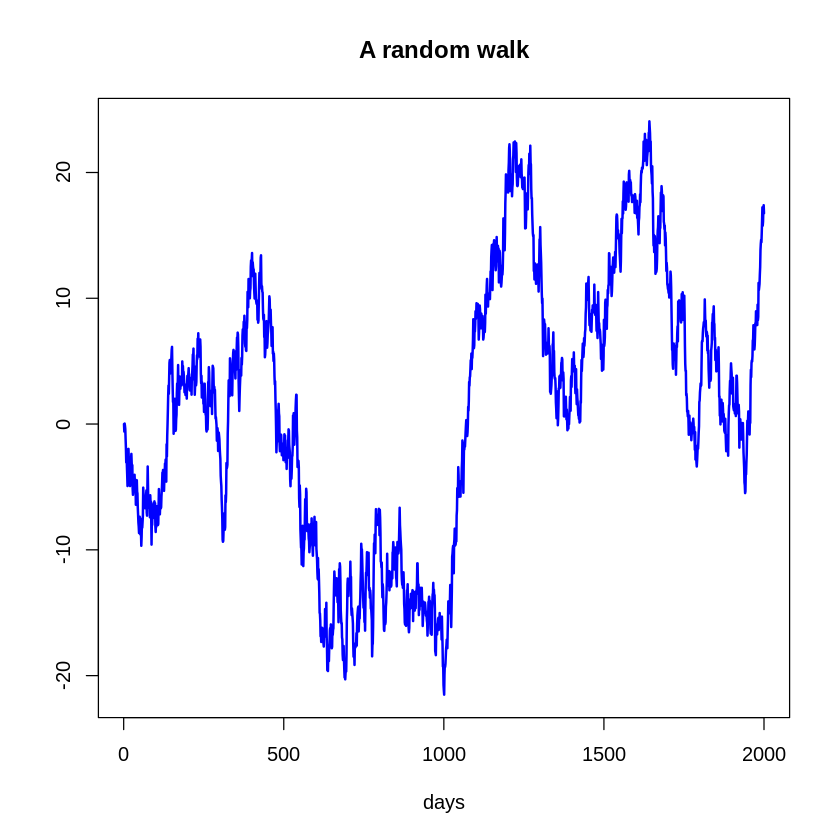

In [11]:
random_walk=ts(x)
plot(random_walk, main='A random walk', ylab='', xlab='days', col='blue', lwd=2) # Not stationary

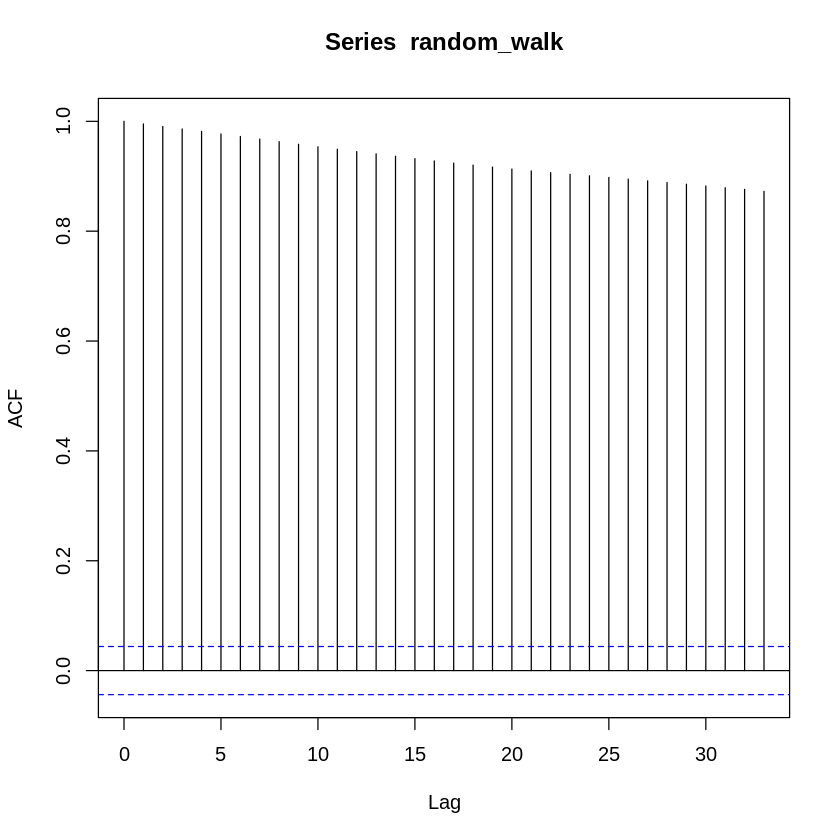

In [12]:
# ACF of random walk
acf(random_walk)  # not stationary

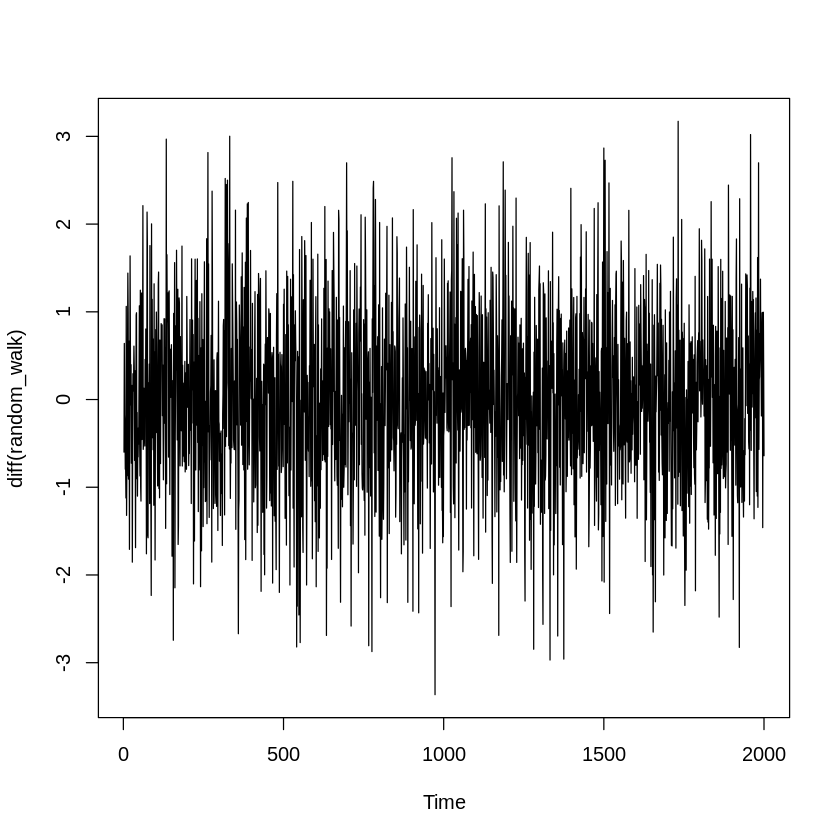

In [13]:
# Take first difference
plot(diff(random_walk))

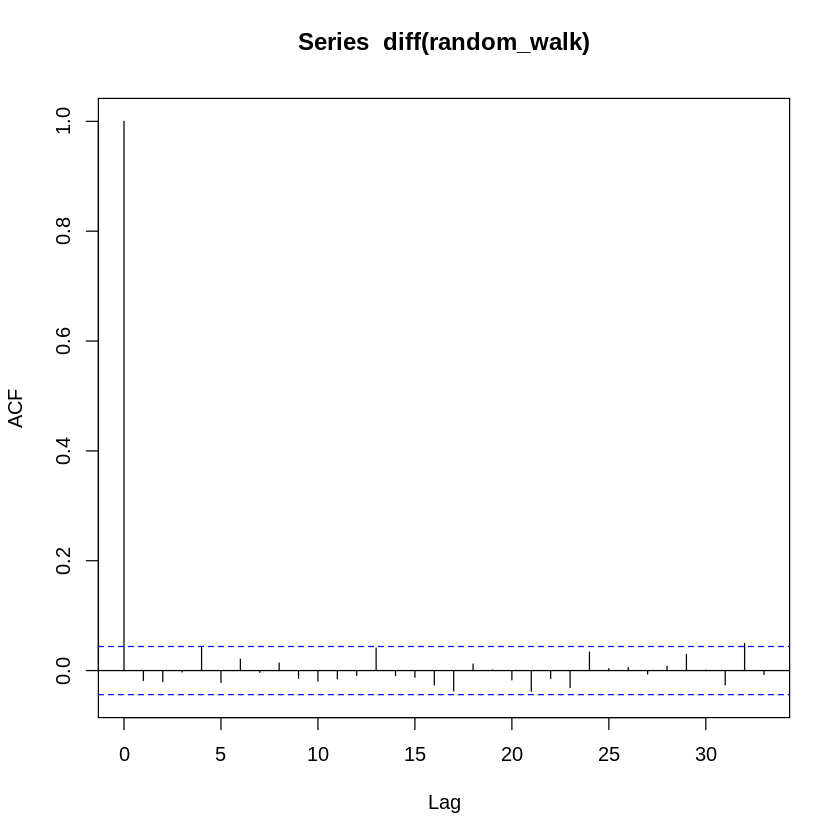

In [14]:
# ACF of first difference
acf(diff(random_walk))

In [15]:
## Simulate Moving Average(2) Process of 10000 observations

 noise=rnorm(10000)      #generate noise series of 10000 observations
 ma_2=NULL # Introduce a variable     # create a null space
 for (i in 3:10000)                   # simulate MA(2) from 3 to 10000
 {
 ma_2[i]=noise[i]+0.7*noise[i-1]+0.2*noise[i-2]
 }
 

In [16]:
ma_2_process=ma_2[3:10000]           # shift data to the left by two units
 ma_2_process=ts(ma_2_process)        #put time series structure

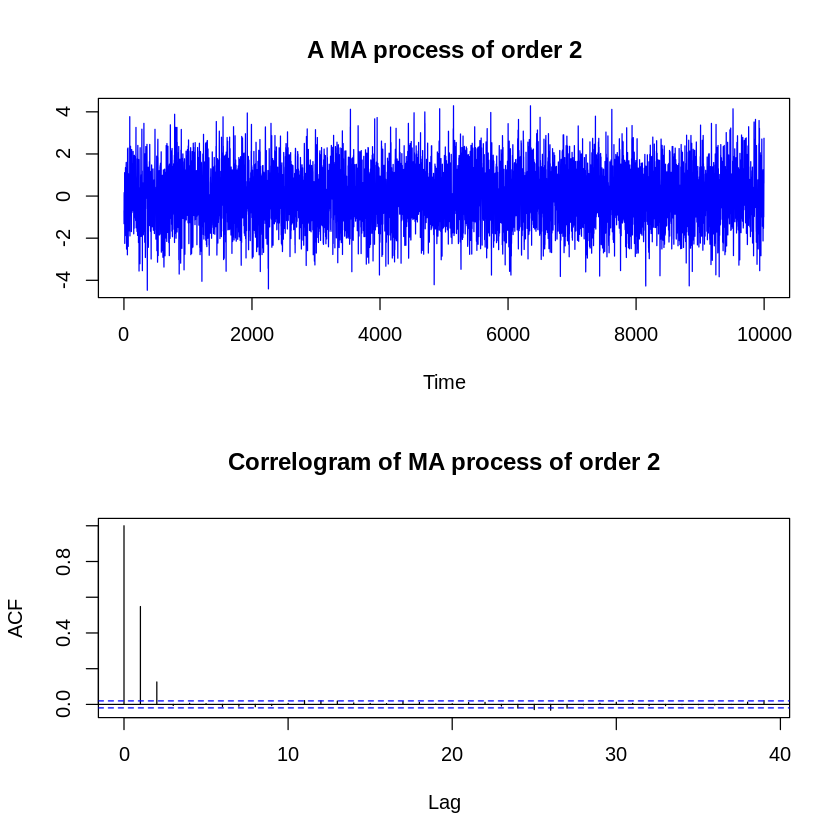

In [17]:
 ## partition output graphics on a multi frame of 2 rows and 1 column
 par(mfrow=c(2,1))

 ## Plot MA(2) series and its ACF
 plot(ma_2_process,main='A MA process of order 2',ylab='',col='blue')
 acf(ma_2_process,main='Correlogram of MA process of order 2')


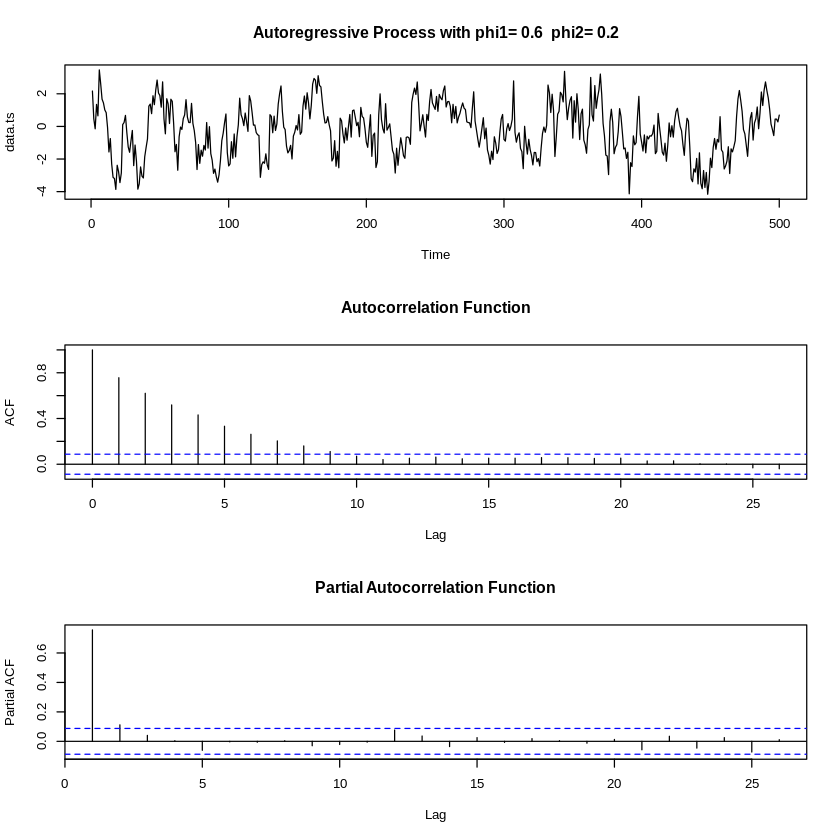

In [18]:
## Simulate AR(2) time-series and plot ACF and PACF

par(mfrow=c(3,1))
phi.1 = .6; phi.2 = .2; 
data.ts = arima.sim(n = 500, list(ar = c(phi.1, phi.2)))
plot(data.ts, main=paste("Autoregressive Process with phi1=",phi.1," phi2=",phi.2) )
acf(data.ts, main="Autocorrelation Function")
acf(data.ts, type="partial", main="Partial Autocorrelation Function")

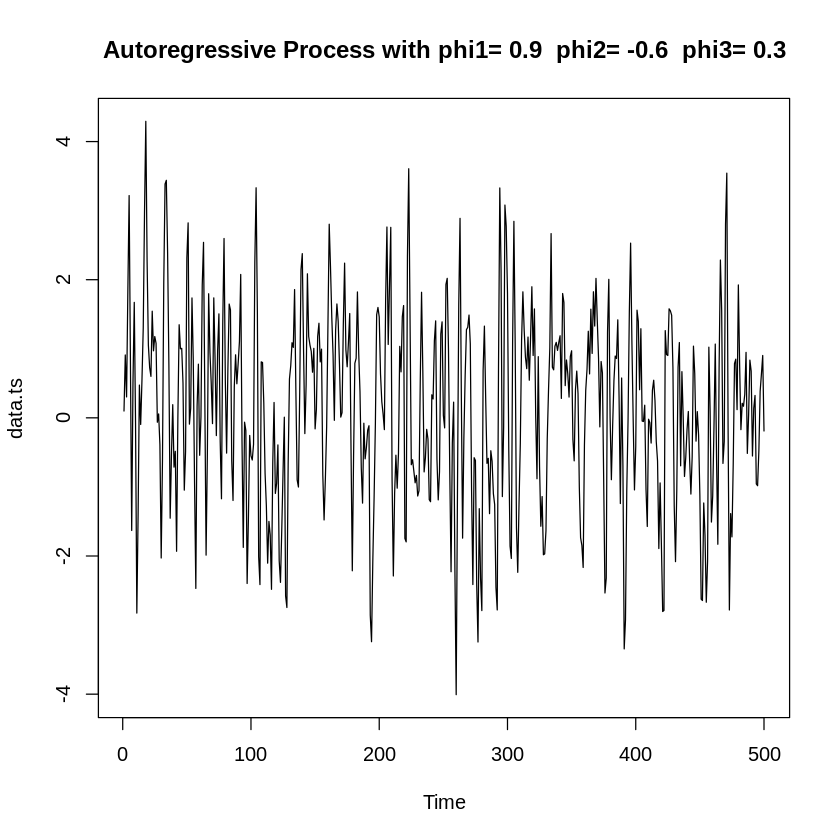

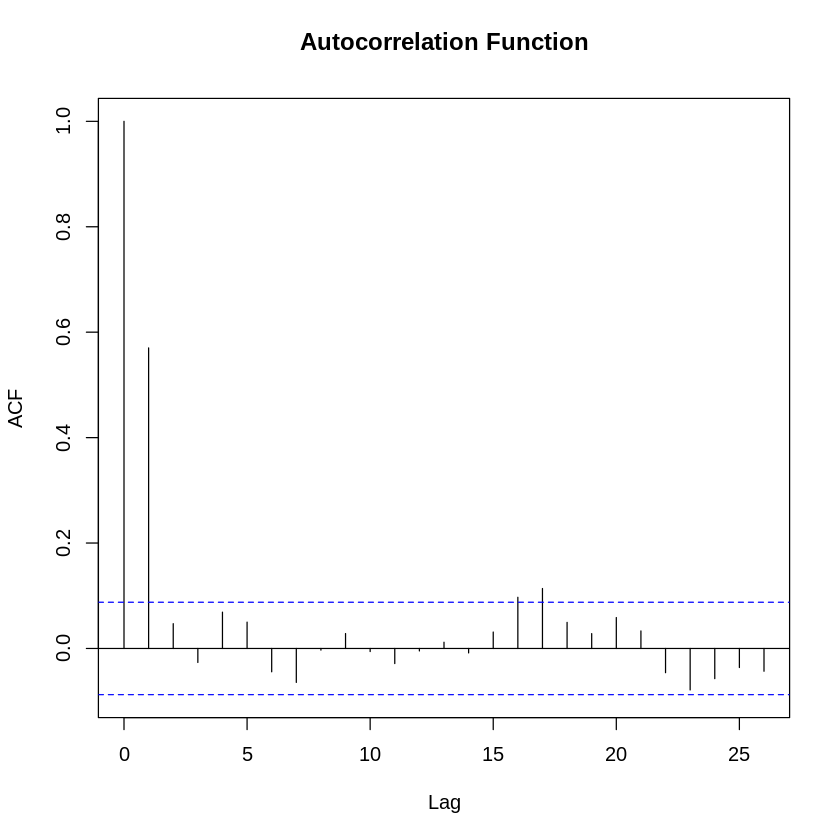

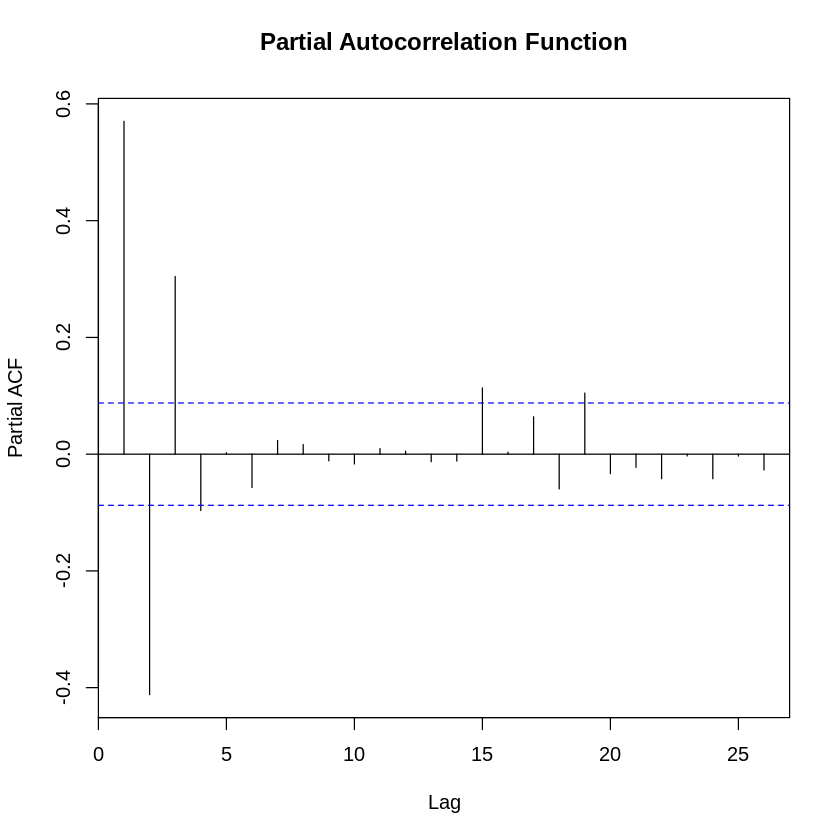

In [19]:
## AR(3) 
phi.1 = .9; phi.2 = -.6; phi.3 = .3;
data.ts = arima.sim(n = 500, list(ar = c(phi.1, phi.2, phi.3)))
plot(data.ts, main= paste("Autoregressive Process with phi1=",phi.1," phi2=",phi.2," phi3=",phi.3) )
acf(data.ts, main="Autocorrelation Function")
acf(data.ts, type="partial", main="Partial Autocorrelation Function")


In [20]:
data=read.csv("/content/data.csv", head=TRUE)

In [21]:
head(data)

,date,aex,ftse100,aus,asx200,atxvienna,cac40,dax,kospi,snp500,⋯,klse,jkse,stoxx50,bel20,ipc,ibovespa,sti,merval,telaviv100,twitaiwan
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,01-07-1997,871.3100,4728.3,2721.2,2660.2,1339.87,2944.0,3834.8,758.03,891.03,⋯,1078.90,731.619,2445.80,2408.6,4508.8,13002,1981.3,818.40,290.32,NA
2,02-07-1997,879.0200,4751.4,2745.9,2685.8,1364.75,2909.5,3867.5,777.29,904.03,⋯,1084.88,730.155,2452.79,2444.9,4559.2,13260,1968.9,824.11,294.50,8996.72
3,03-07-1997,897.1000,4831.7,2742.9,2681.3,1381.40,2937.0,3939.7,775.26,916.92,⋯,1080.61,735.492,2491.58,2488.1,4591.6,13285,1962.4,831.44,295.15,9027.63
4,04-07-1997,907.1900,4812.8,2733.4,2673.1,1388.18,2934.5,3946.7,781.70,912.20,⋯,1073.31,736.597,2509.09,2473.2,4644.6,13494,1985.9,837.95,295.15,9192.57
5,07-07-1997,918.8501,4810.7,2713.0,2653.7,1390.58,2947.7,4003.4,773.51,918.75,⋯,1060.53,738.006,2531.84,2504.5,4741.2,13502,1998.0,841.69,302.77,9322.84
6,08-07-1997,918.0400,4758.5,2679.2,2621.8,1391.40,2929.8,4030.1,767.74,907.54,⋯,1057.77,740.833,2520.46,2493.2,4821.1,13617,2007.2,846.33,303.85,9305.27


In [22]:
#Remove date column
data=data[,-1]

In [23]:
#extract S&P 500 Series
snp=data$snp500

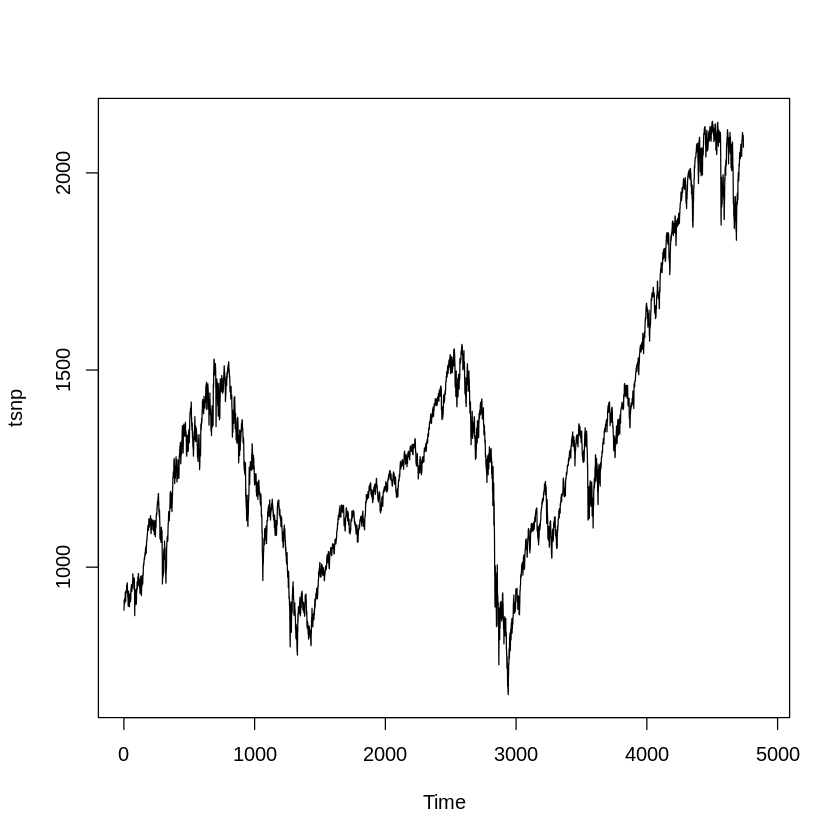

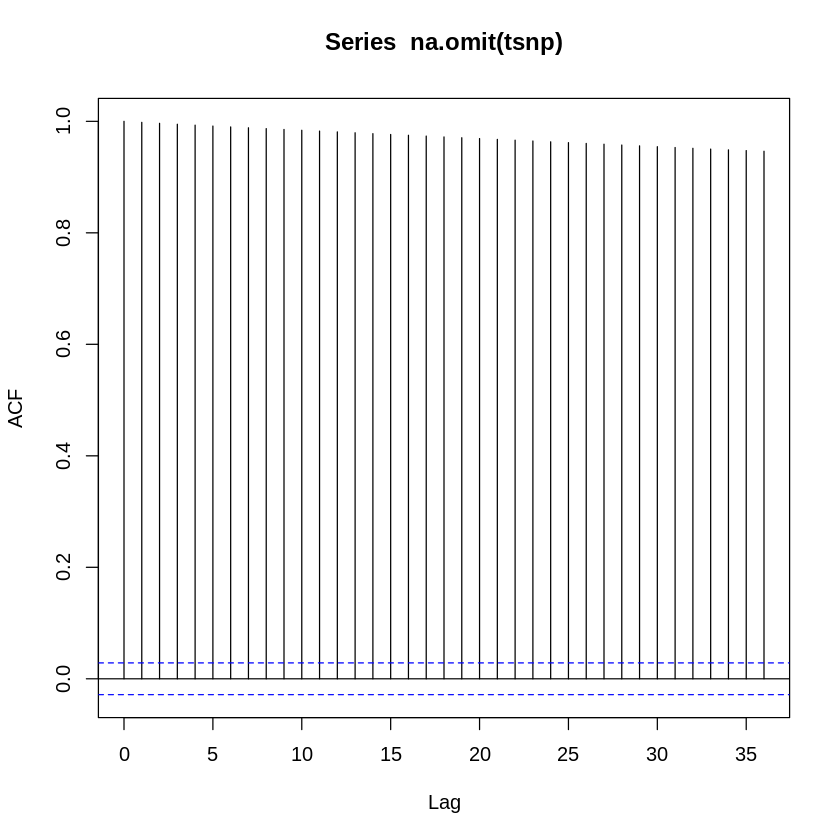

In [25]:
tsnp=ts(snp)
plot(tsnp)
acf(na.omit(tsnp))


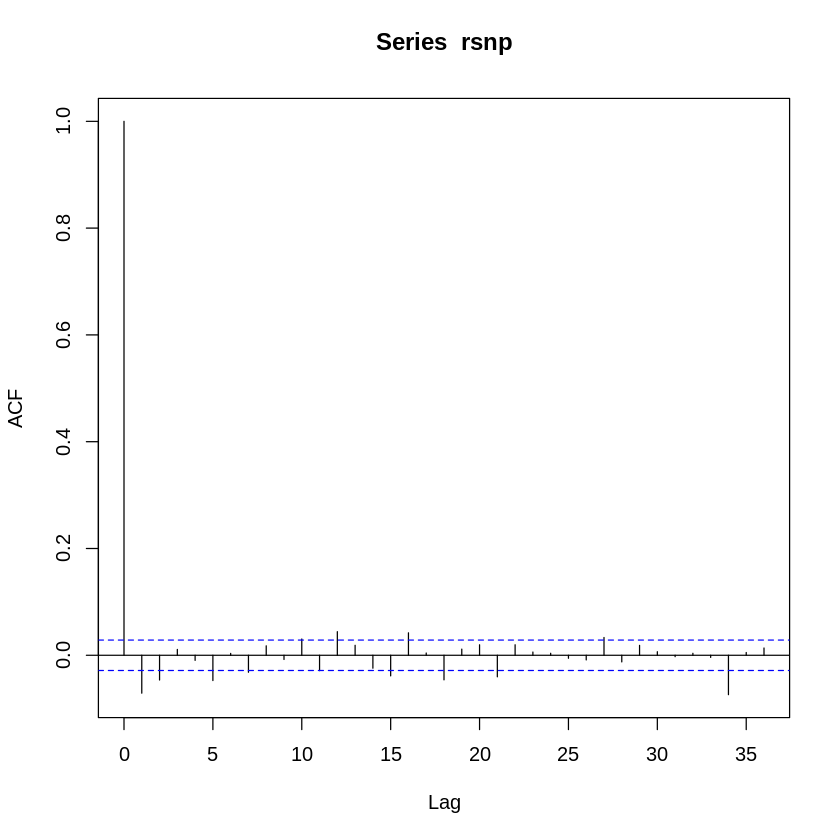

In [27]:
tsnp=na.omit(tsnp)
rsnp=diff(log(tsnp))
acf(rsnp)

In [28]:
# use AR function to estimate AR model
ar(rsnp, order.max = 5)


Call:
ar(x = rsnp, order.max = 5)

Coefficients:
      1        2        3        4        5  
-0.0749  -0.0517   0.0005  -0.0145  -0.0485  

Order selected 5  sigma^2 estimated as  0.0001569

In [29]:
## AR using arima() function
arima(rsnp, order=c(2,0,0), include.mean=FALSE )


Call:
arima(x = rsnp, order = c(2, 0, 0), include.mean = FALSE)

Coefficients:
          ar1      ar2
      -0.0744  -0.0514
s.e.   0.0145   0.0145

sigma^2 estimated as 0.0001571:  log likelihood = 14026.16,  aic = -28046.31

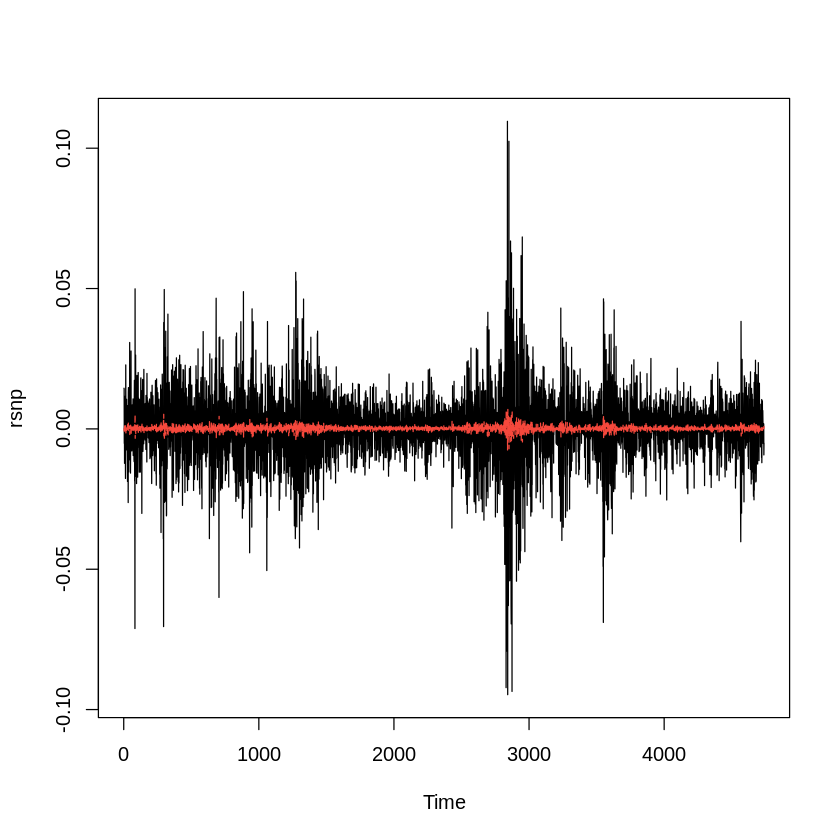

In [32]:
ar <- arima(rsnp , order = c(1, 0, 0))
residuals <- residuals(ar)
fitted <- rsnp - residuals
ts.plot(rsnp)
points(fitted, type = "l", col = 2, lty = 2)


### Forecasting **example**

,ME,RMSE,MAE,MPE,MAPE
Test set,-2.119421,2.417311,2.255564,-Inf,Inf


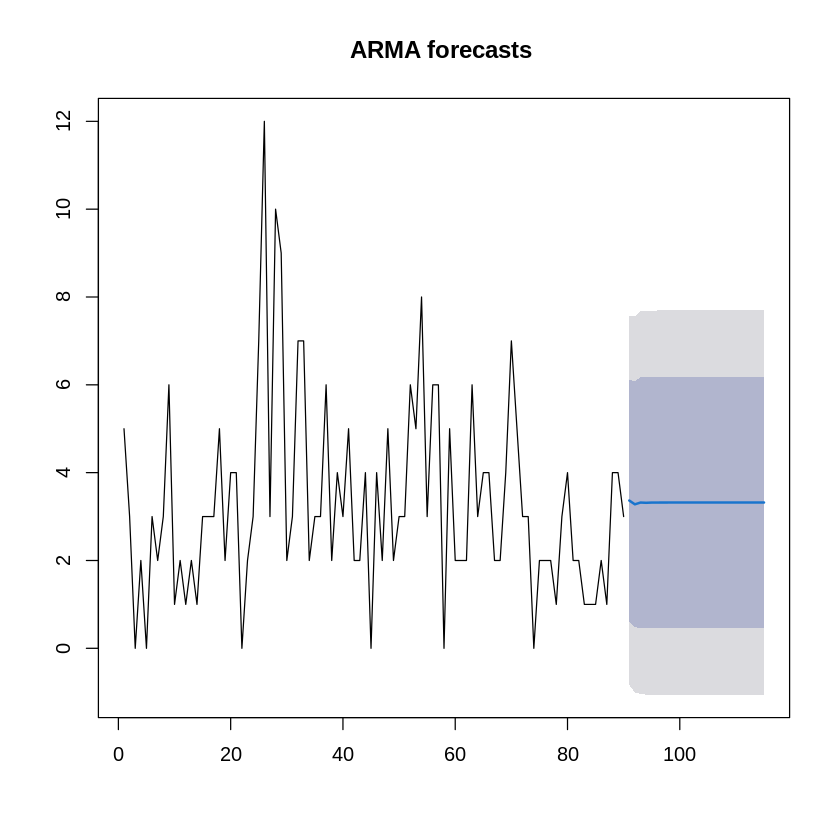

In [33]:
 discoveries_train <- discoveries[1:(0.9 * length(discoveries))]  # Train dataset
 discoveries_test <- discoveries[(0.9 * length(discoveries) + 1):length(discoveries)]  # Test dataset

 fit <- arima(discoveries_train, order = c(2, 0, 0))
 
 arma.preds <- predict(fit, n.ahead = (length(discoveries) - (0.9 * length(discoveries))))$pred
 n.ahead = (length(discoveries) - (0.9 * length(discoveries))) 
 arma.forecast <- forecast(fit, h = 25)
 plot(arma.forecast, main = "ARMA forecasts ")
 
 accuracy(arma.preds, discoveries_test)